In [1]:
#importing libraries 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd


Reading , cleaning and primary preperation of data 

In [4]:
data = pd.read_csv("/Users/yashpalkar/Downloads/Sales Data.csv").dropna()
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [5]:
data.shape

(185950, 11)

In [6]:
data.sample(5)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
174449,2070,211885,USB-C Charging Cable,2,11.95,2019-06-30 23:15:00,"948 4th St, San Francisco, CA 94016",6,23.90,San Francisco,23
117604,1101,260403,27in 4K Gaming Monitor,1,389.99,2019-10-15 21:14:00,"744 Sunset St, Atlanta, GA 30301",10,389.99,Atlanta,21
156566,10141,257877,Google Phone,1,600.00,2019-09-26 11:52:00,"29 Highland St, Los Angeles, CA 90001",9,600.00,Los Angeles,11
163567,5499,228164,Lightning Charging Cable,1,14.95,2019-07-20 21:30:00,"788 8th St, Portland, OR 97035",7,14.95,Portland,21
130374,13929,272647,Lightning Charging Cable,2,14.95,2019-10-09 12:17:00,"876 Ridge St, Dallas, TX 75001",10,29.90,Dallas,12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [8]:
data.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [9]:
data.count()

Unnamed: 0          185950
Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
Sales               185950
City                185950
Hour                185950
dtype: int64

In [10]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [11]:
data.head

<bound method NDFrame.head of         Order ID                 Product  Quantity Ordered  Price Each  \
0         295665      Macbook Pro Laptop                 1     1700.00   
1         295666      LG Washing Machine                 1      600.00   
2         295667    USB-C Charging Cable                 1       11.95   
3         295668        27in FHD Monitor                 1      149.99   
4         295669    USB-C Charging Cable                 1       11.95   
...          ...                     ...               ...         ...   
185945    222905  AAA Batteries (4-pack)                 1        2.99   
185946    222906        27in FHD Monitor                 1      149.99   
185947    222907    USB-C Charging Cable                 1       11.95   
185948    222908    USB-C Charging Cable                 1       11.95   
185949    222909  AAA Batteries (4-pack)                 1        2.99   

                 Order Date                        Purchase Address  Month  \
0  

In [13]:
data.describe()

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [14]:
data.shape

(185950, 10)

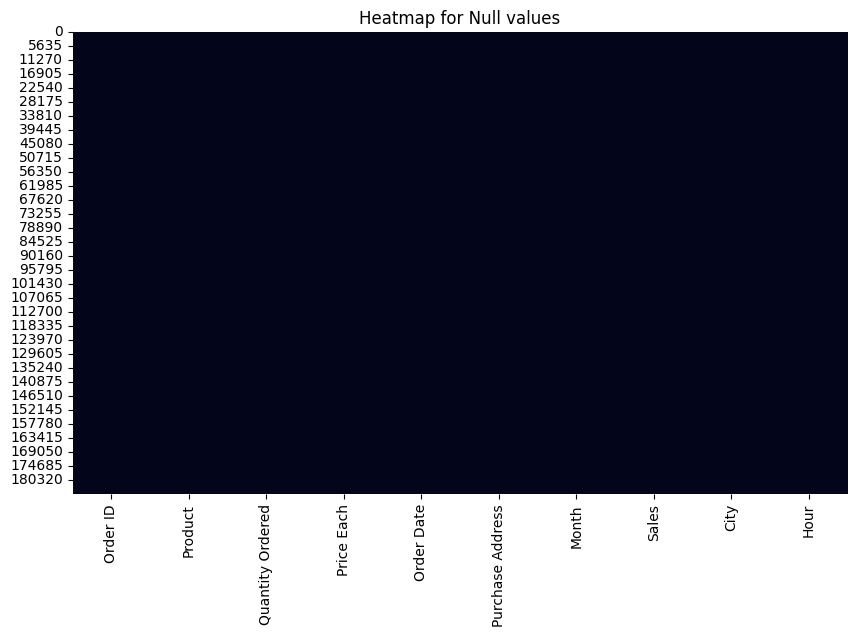

In [16]:
# Check missing values in dataset by heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),cbar=False)
plt.title('Heatmap for Null values')
plt.show()

In [18]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [19]:
# check duplicate values in dataset
data.duplicated().sum()

264

In [20]:
# See the Duplilcated values
df_cleaned = data[data.duplicated()]
df_cleaned.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [22]:
# group by all columns except those to be aggregated
columns_to_group_by = ['Product', 'Order Date', 'Purchase Address', 'Month', 'City', 'Hour']


# Aggregae the duplicated rows by summing 'Quantity ordered' and 'sales'
df_aggregated = data.groupby(columns_to_group_by).agg({
    'Quantity Ordered': 'sum',
    'Sales' : 'sum',
    'Price Each' : 'first' # or mean if needed
}).reset_index()

df_aggregated.to_csv('cleaned_dataset.csv', index=False)

print('Duplicates handled and cleaned dataset saved.')

Duplicates handled and cleaned dataset saved.


In [23]:
# Convert Order data dtype into datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
 9   Hour              185950 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 14.2+ MB


In [25]:
# df.select_dtypes(include=['int64','float64'])

df_sample = data.sample(n=1000)  # Adjust the sample size as needed
df_sample.select_dtypes(include=['int64', 'float64'])

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
73167,239314,1,99.99,8,99.99,22
79415,245311,1,1700.00,8,1700.00,19
3537,299049,1,150.00,1,150.00,1
137690,142095,1,150.00,1,150.00,0
50848,157752,1,150.00,2,150.00,10
...,...,...,...,...,...,...
104477,284127,1,3.84,11,3.84,13
180294,217492,1,150.00,6,150.00,20
19259,314157,1,11.99,12,11.99,9
148435,250036,3,2.99,9,8.97,12


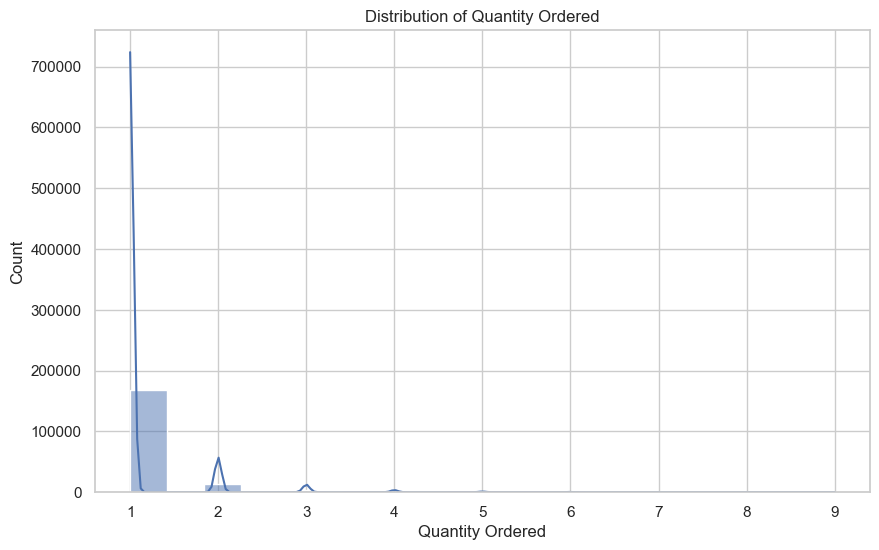

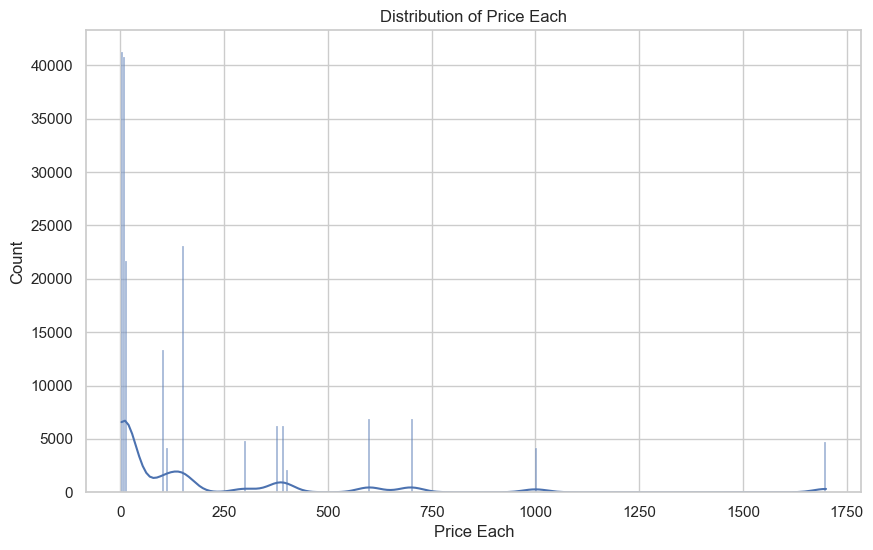

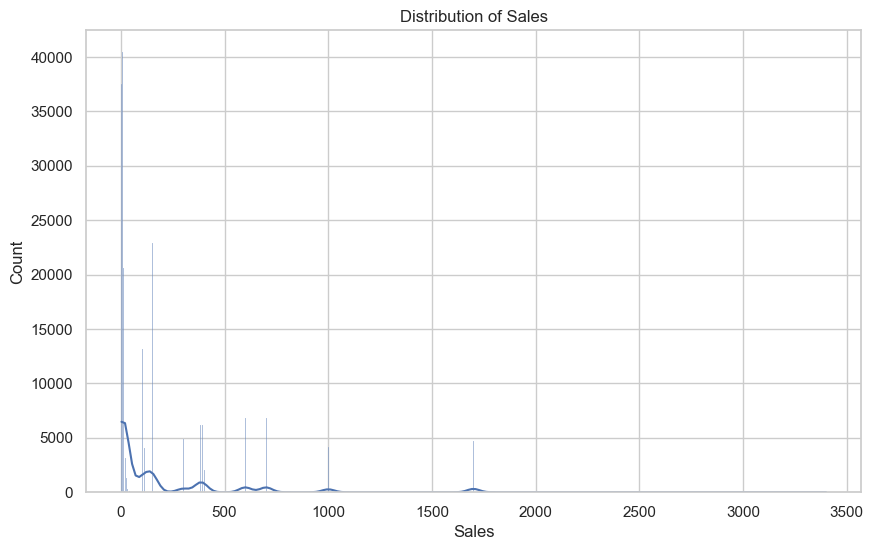

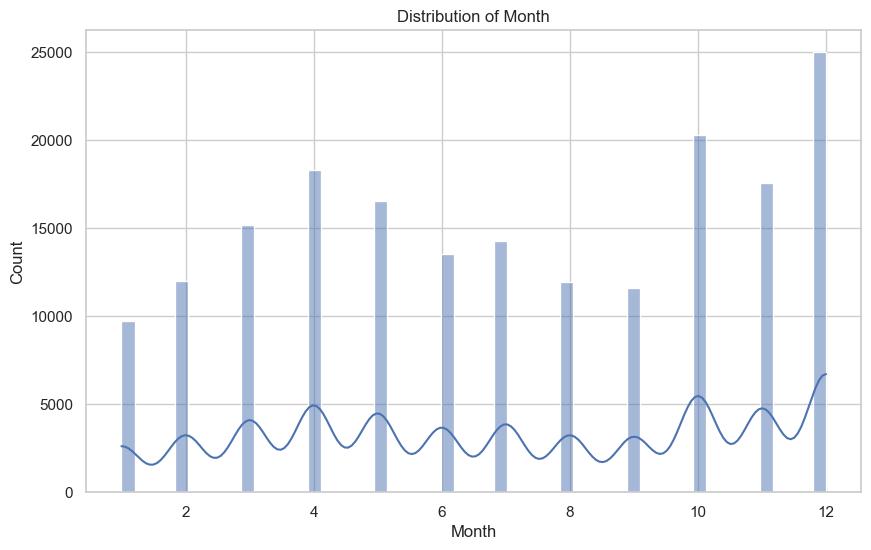

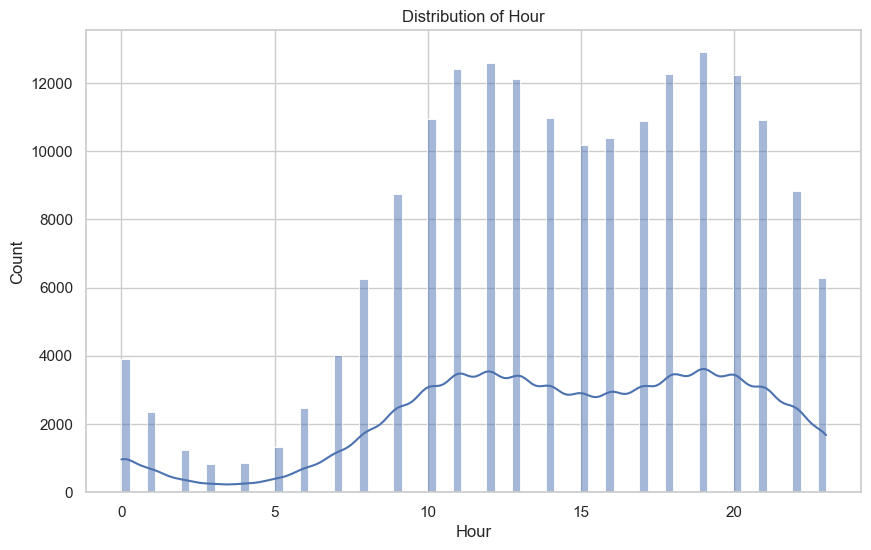

In [27]:
# Plotting settings
sns.set(style="whitegrid")

# Distribution plots for numerical columns
numerical_columns = ['Quantity Ordered','Price Each', 'Sales', 'Month', 'Hour']
for column in numerical_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

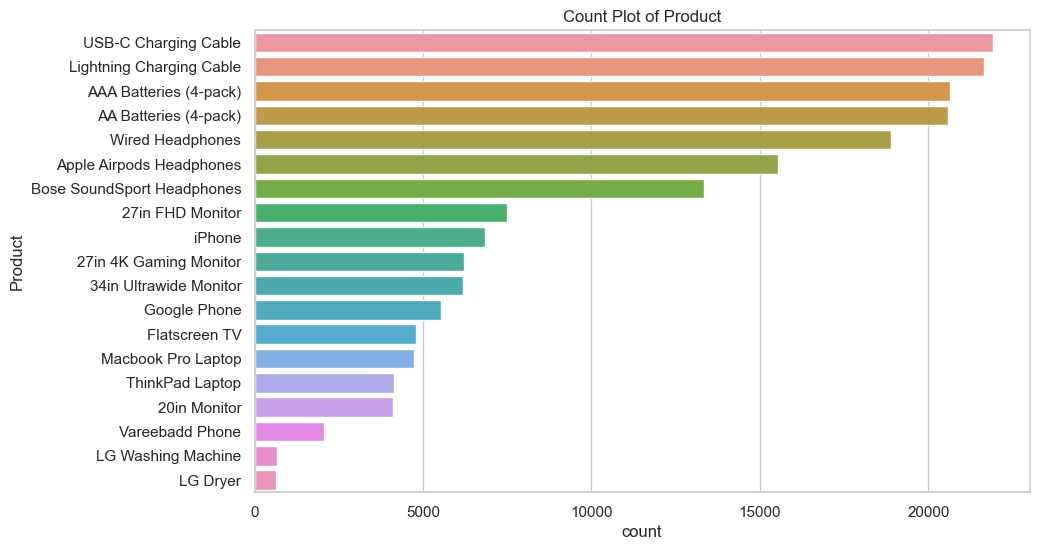

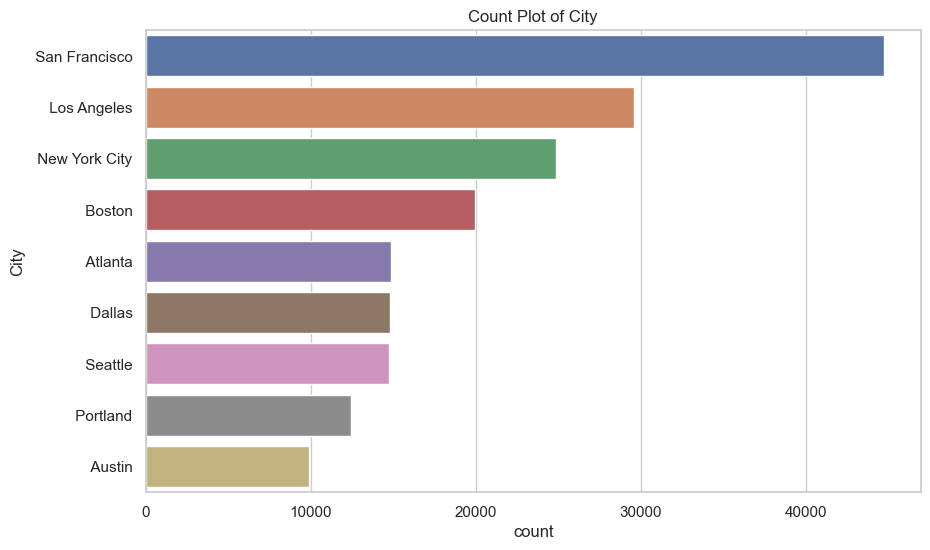

In [28]:
# Count plots for categorical columns
categorical_columns = ['Product', 'City']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[column], order=data[column].value_counts().index)
    plt.title(f'Count Plot of {column}')
    plt.show()

In [30]:
corr_matrix = data.select_dtypes(include=['number']).corr()
corr_matrix

,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
Order ID,1.000000,0.000702,-0.002857,0.993063,-0.002949,0.001175
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791,-0.139417,-0.002218
Price Each,-0.002857,-0.148272,1.000000,-0.003375,0.999203,0.001721
Month,0.993063,0.000791,-0.003375,1.000000,-0.003466,0.001731
Sales,-0.002949,-0.139417,0.999203,-0.003466,1.000000,0.001668
Hour,0.001175,-0.002218,0.001721,0.001731,0.001668,1.000000


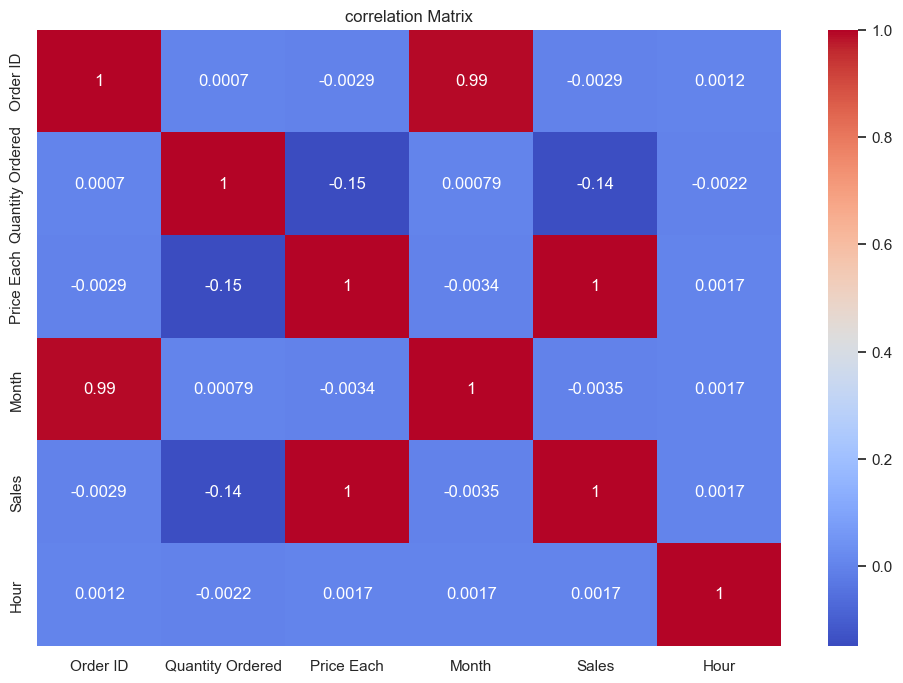

In [31]:
# correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('correlation Matrix')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


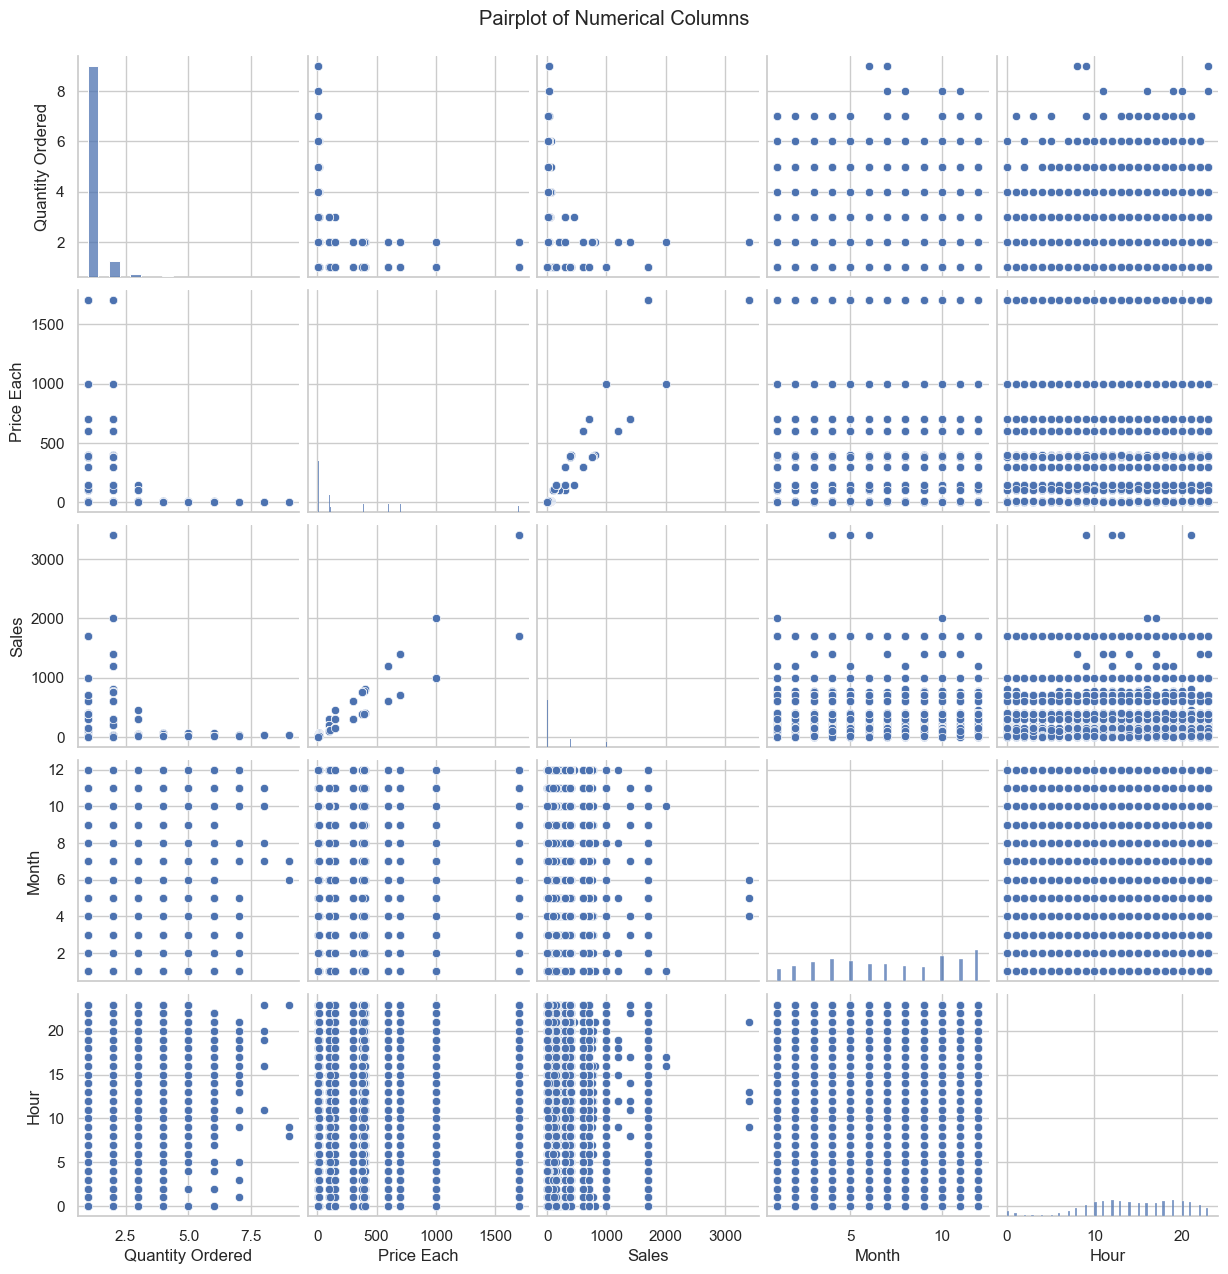

In [33]:
# scatter plots for pairs of numerical columns
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

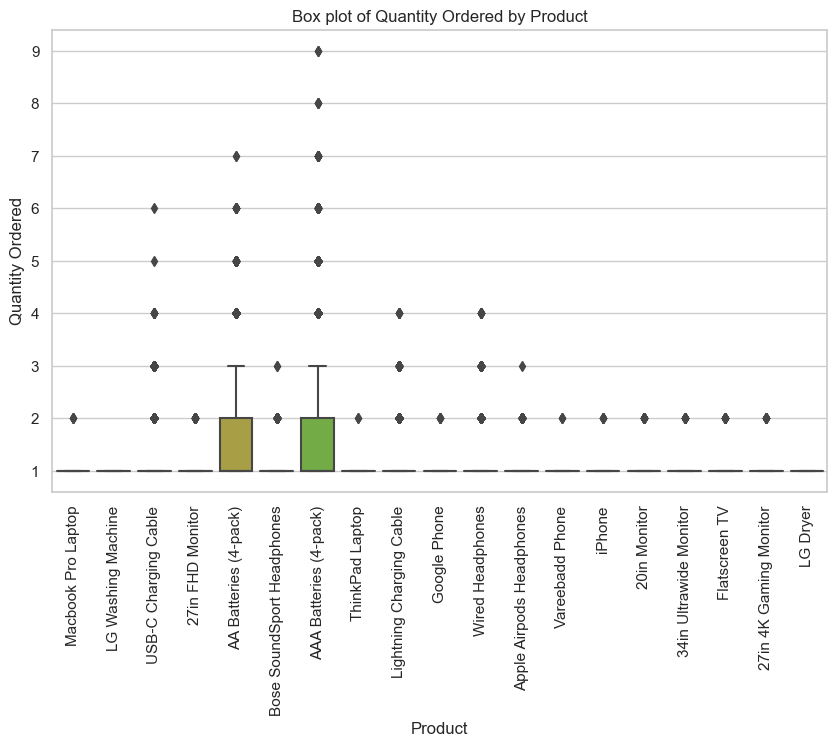

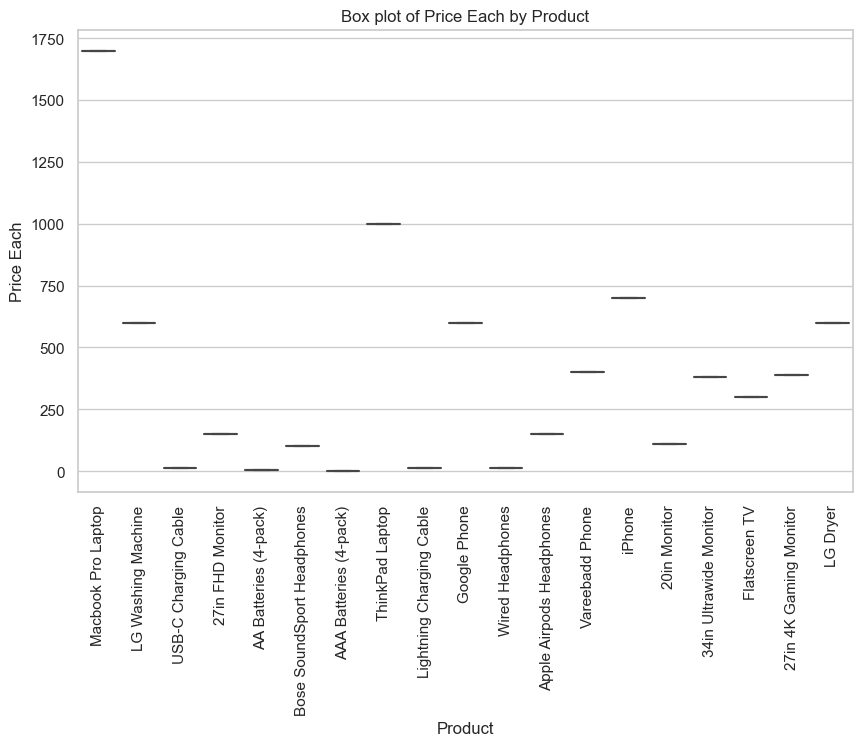

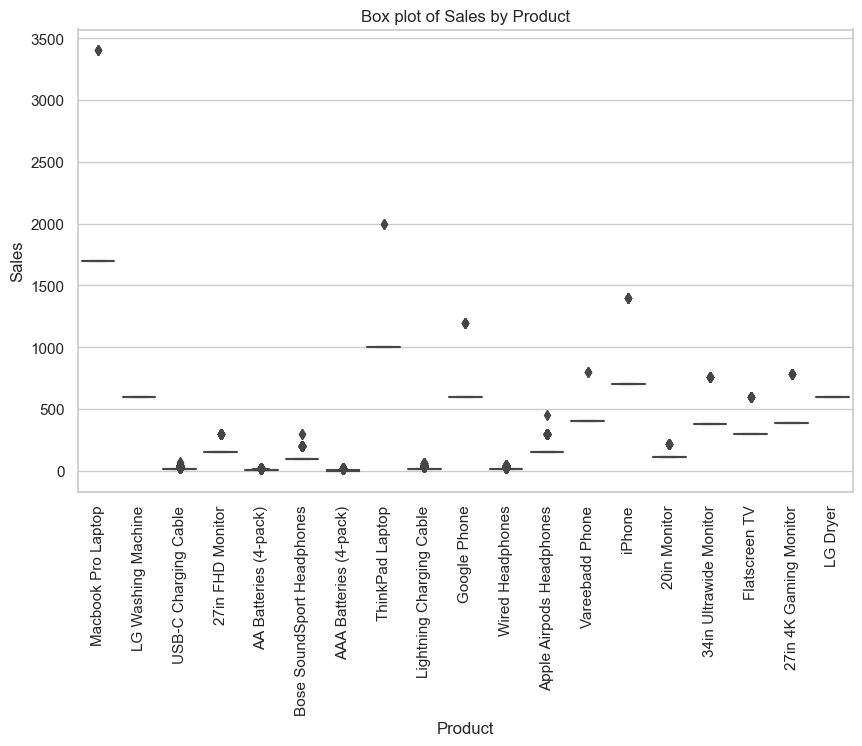

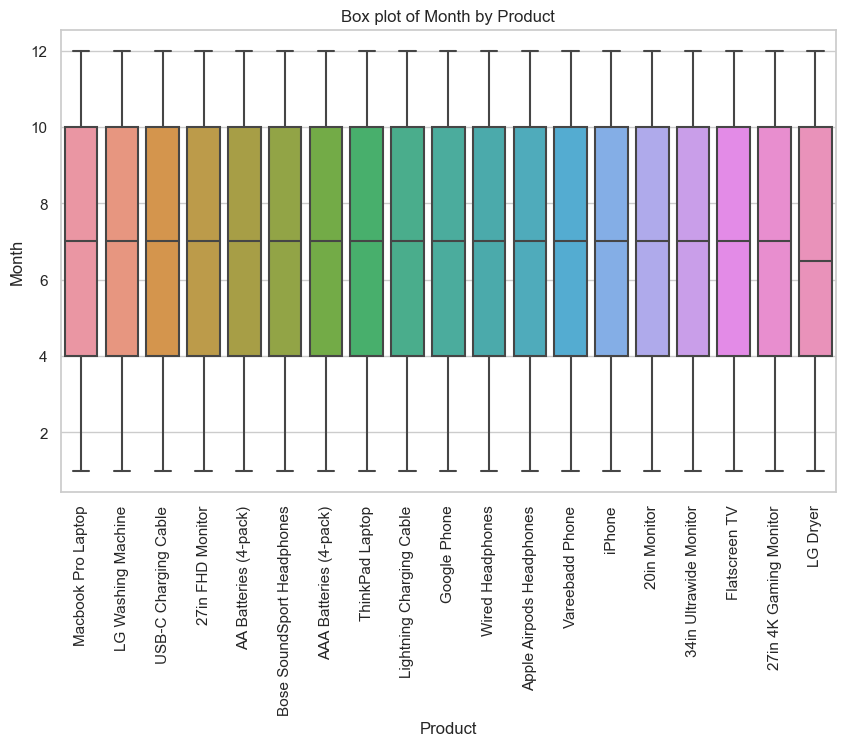

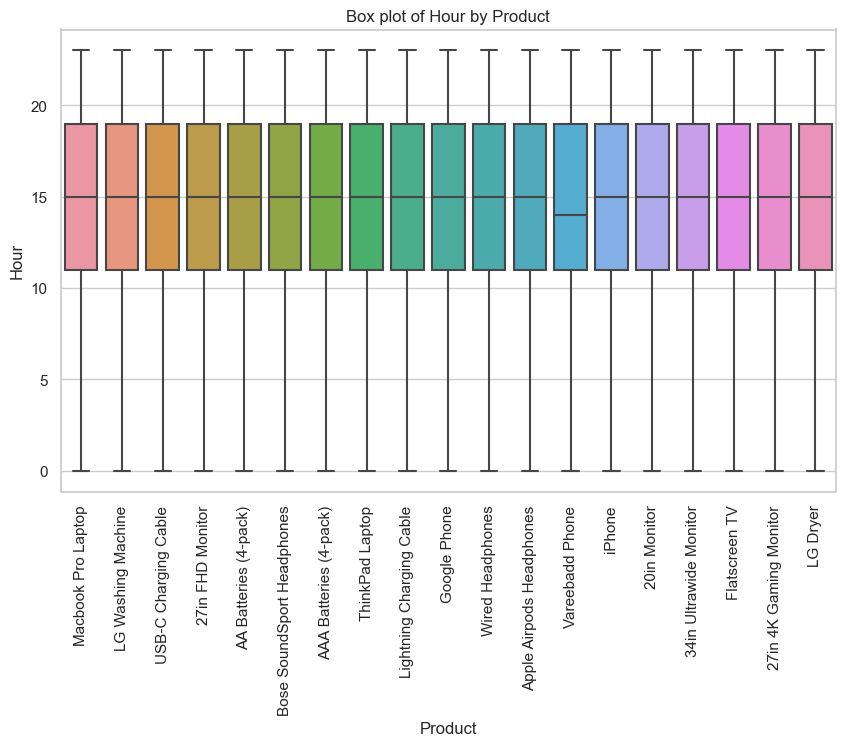

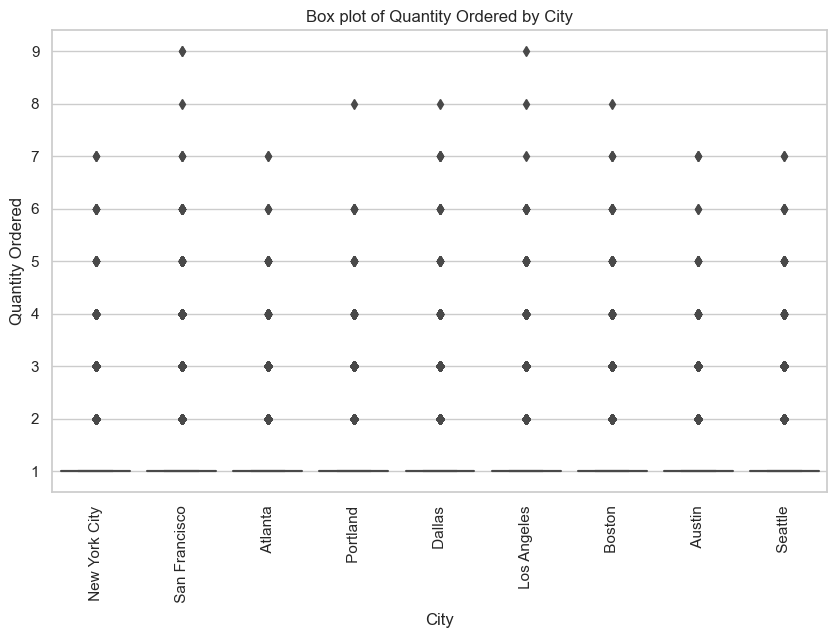

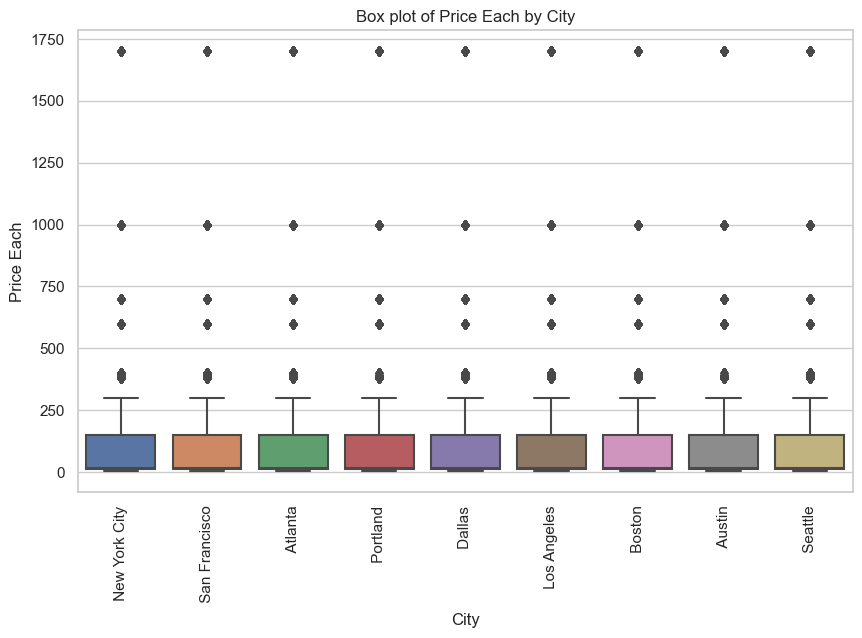

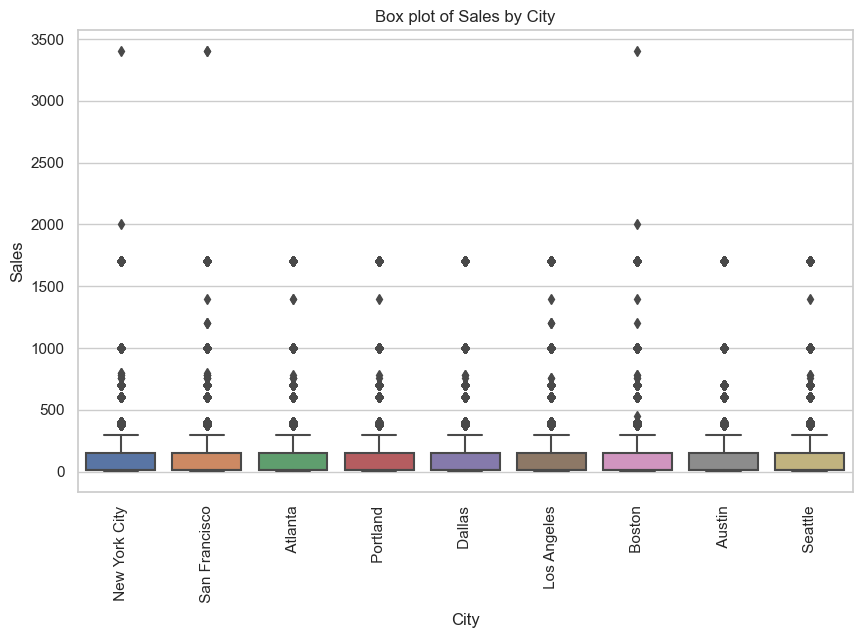

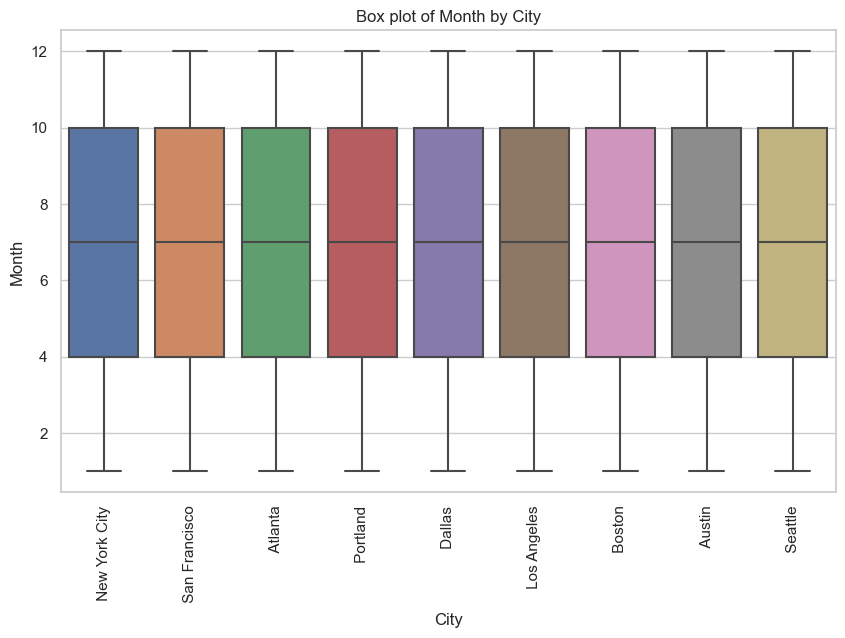

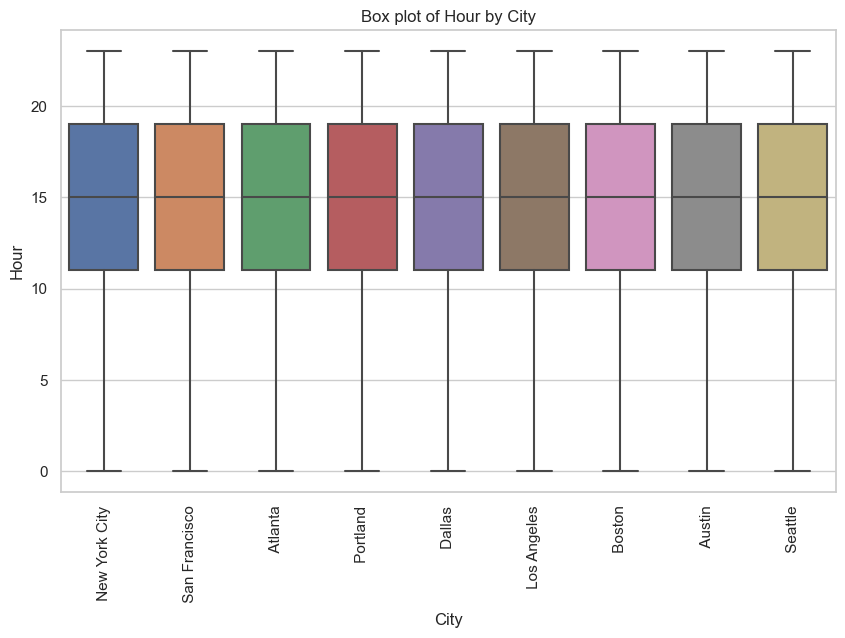

In [35]:
# Box plots for numerical vs categorical columns
for cat_column in categorical_columns:
    for num_column in numerical_columns:
        plt.figure(figsize=(10,6))
        sns.boxplot(x=cat_column, y=num_column, data=data)
        plt.title(f'Box plot of {num_column} by {cat_column}')
        plt.xticks(rotation=90)
        plt.show()

In [36]:
df_sample.select_dtypes(include=['object']).head(3)

,Product,Purchase Address,City
73167,Bose SoundSport Headphones,"527 Lake St, Dallas, TX 75001",Dallas
79415,Macbook Pro Laptop,"956 Main St, San Francisco, CA 94016",San Francisco
3537,Apple Airpods Headphones,"762 Johnson St, San Francisco, CA 94016",San Francisco


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


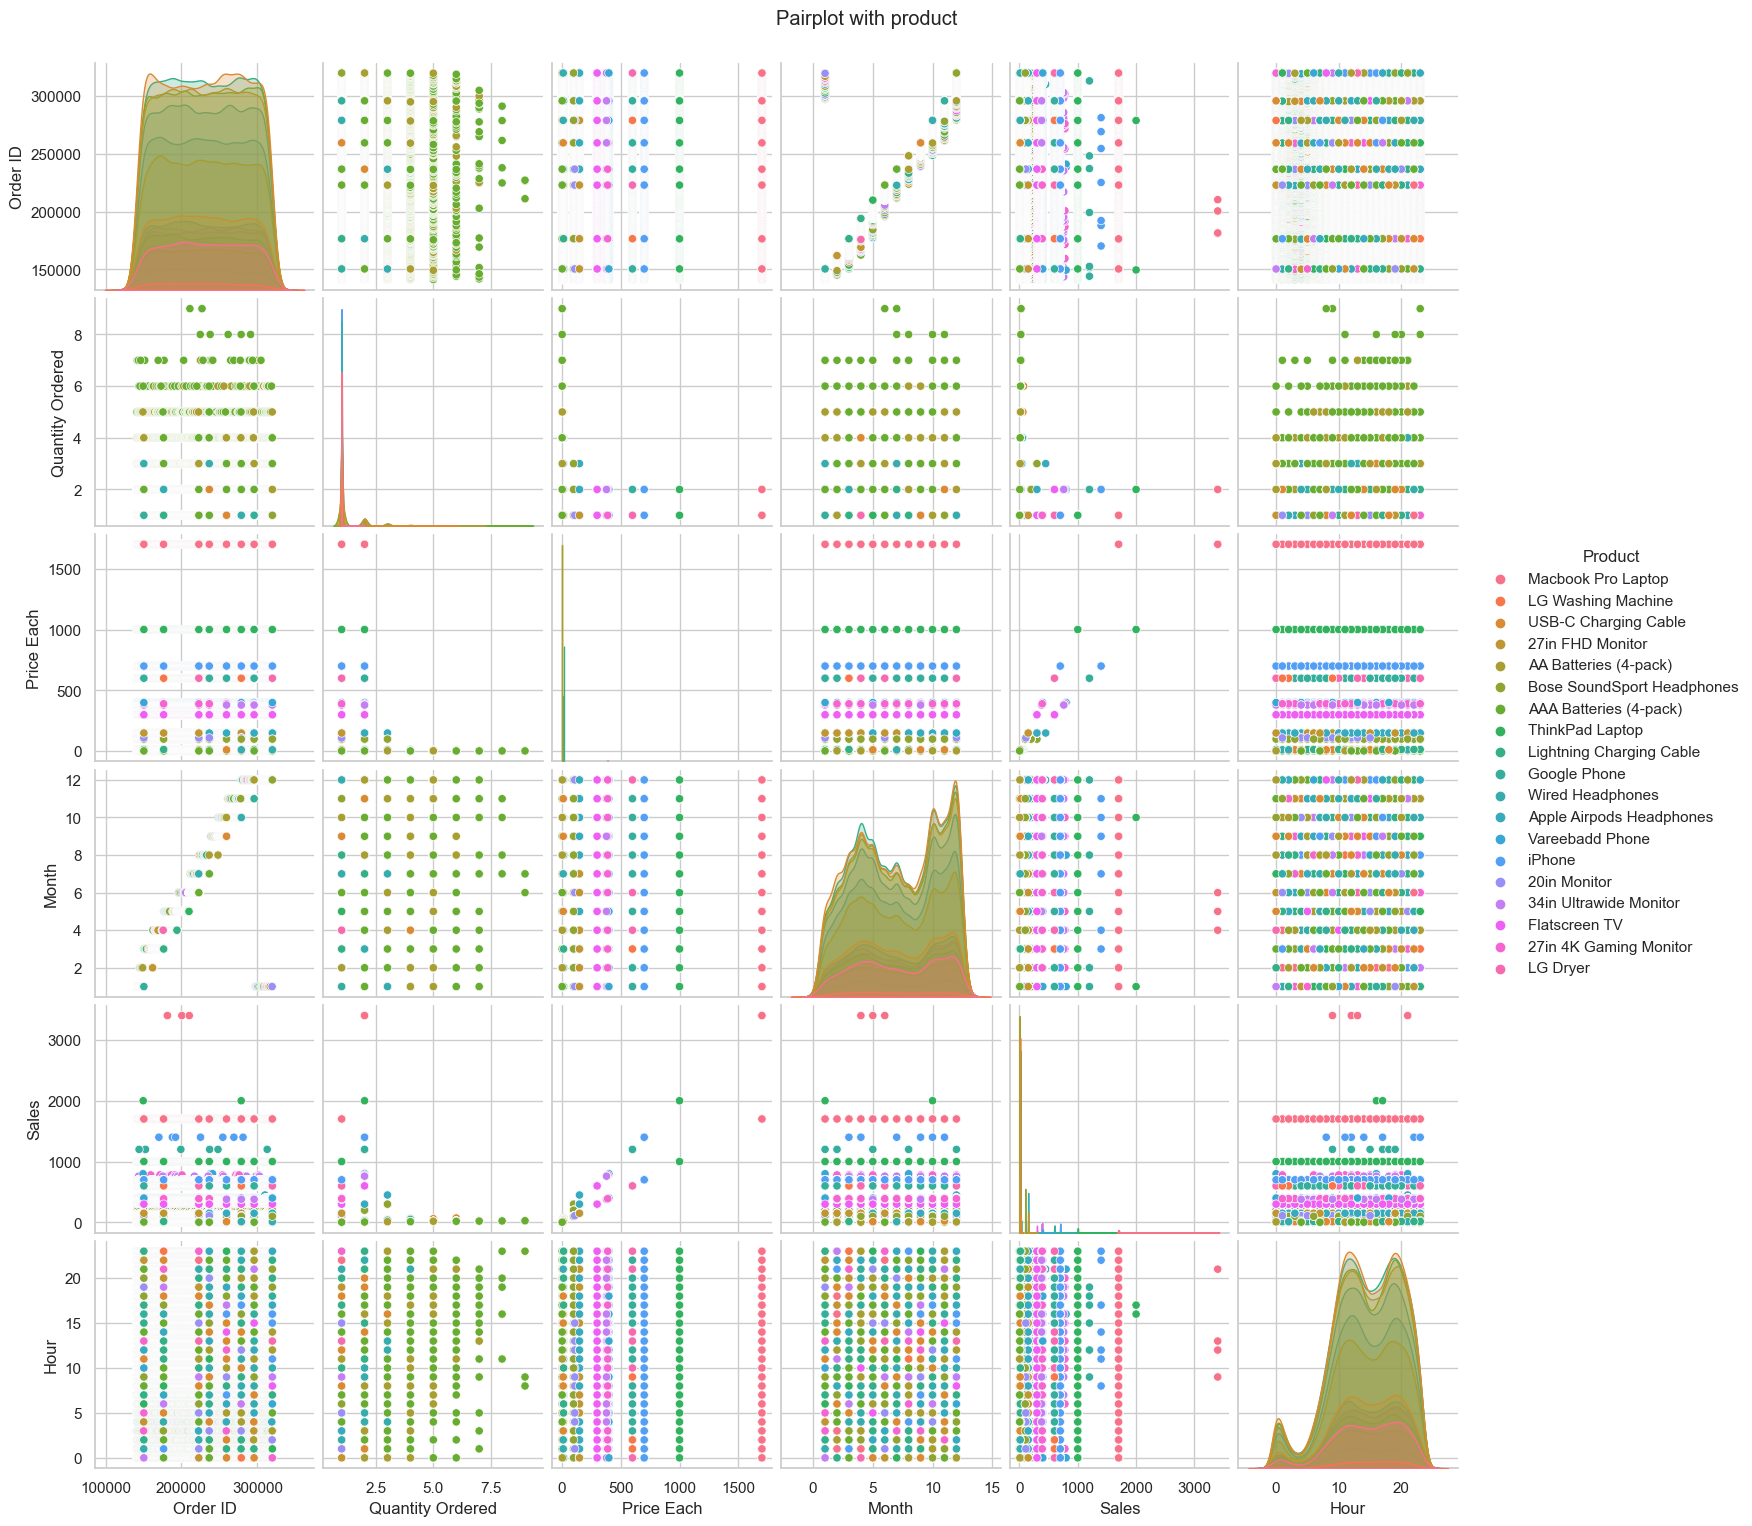

In [38]:
# Pair Pplot with hue for a categorical column
sns.pairplot(data, hue = 'Product')
plt.suptitle('Pairplot with product', y=1.02)
plt.show()


In [40]:
# Check the number of unique values
unique_products = data['Product'].nunique()
unique_cities = data['City'].nunique()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


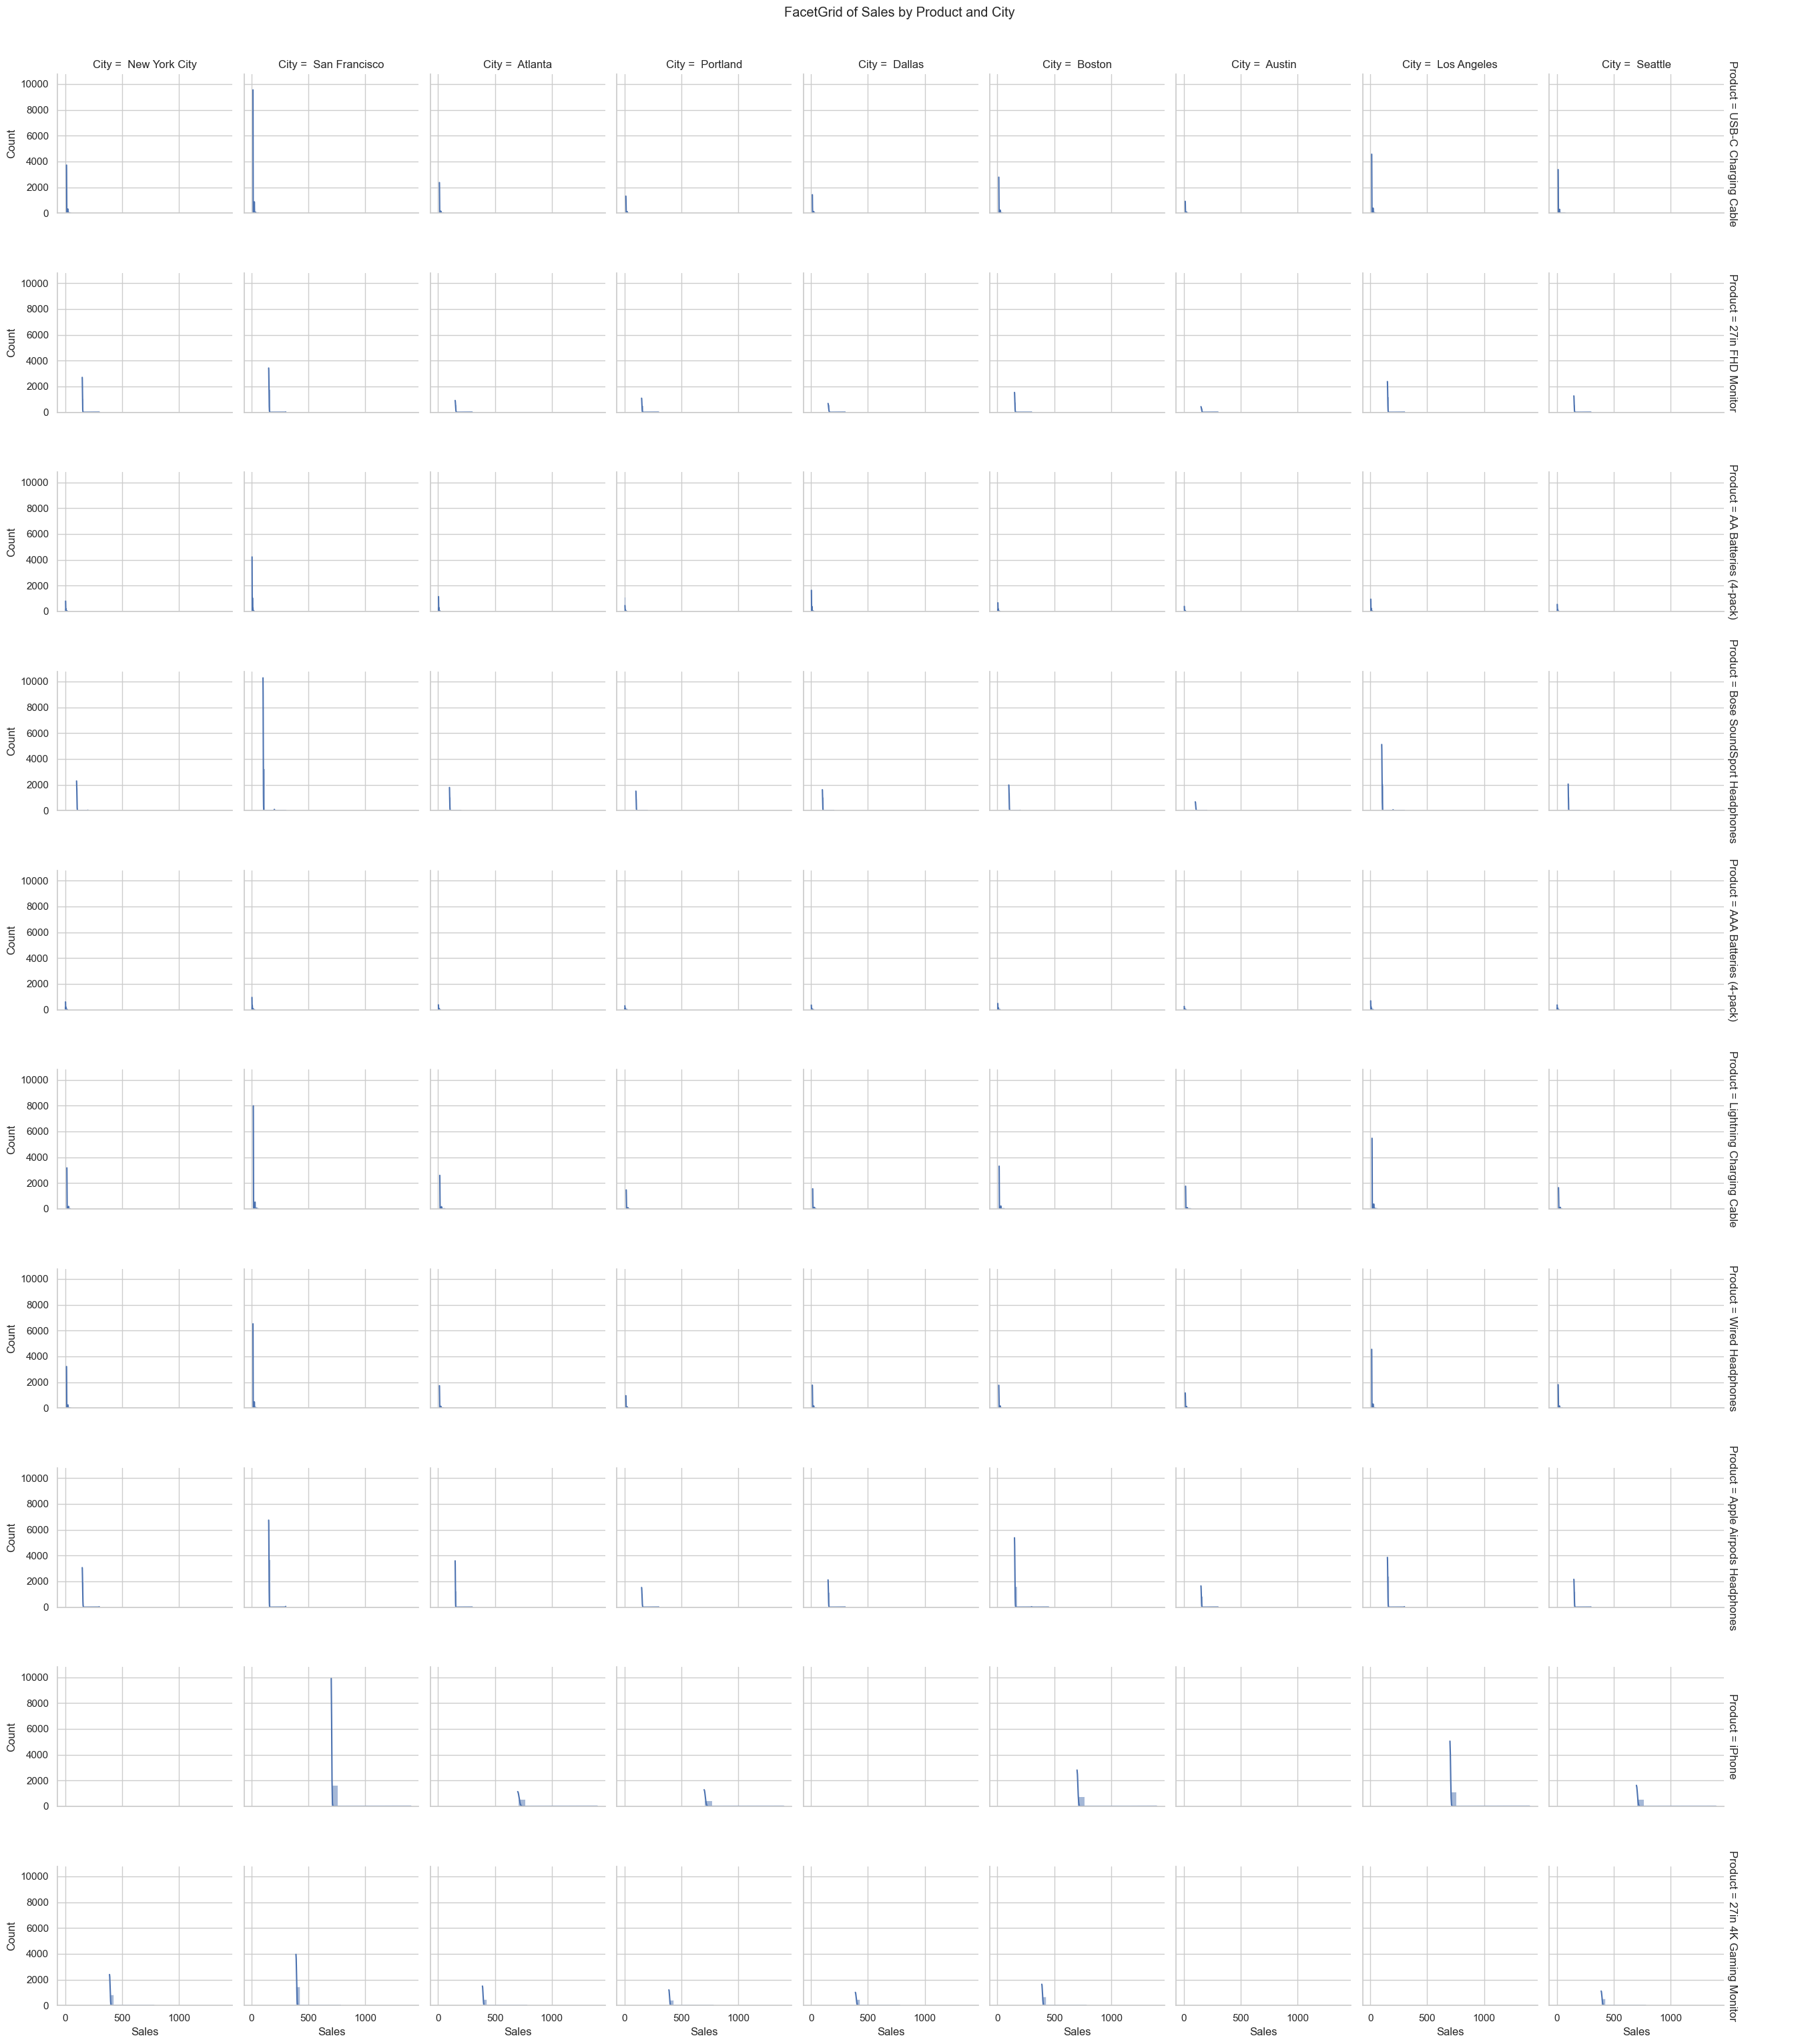

In [42]:
# If there are too many unique values, filter to a manageable subset
if unique_products > 10:
    products_to_plot = data['Product'].value_counts().index[:10]
    df = data[data['Product'].isin(products_to_plot)]

if unique_cities > 5:
    cities_to_plot = df['City'].value_counts().index[:5]
    data = data[data['City'].isin(cities_to_plot)]

# Create the FacetGrid
g = sns.FacetGrid(df, col='City', row='Product', margin_titles=True, height=3)
g.map_dataframe(sns.histplot, 'Sales', kde=True)
g.add_legend()
plt.suptitle('FacetGrid of Sales by Product and City', y=1.02)
plt.show()

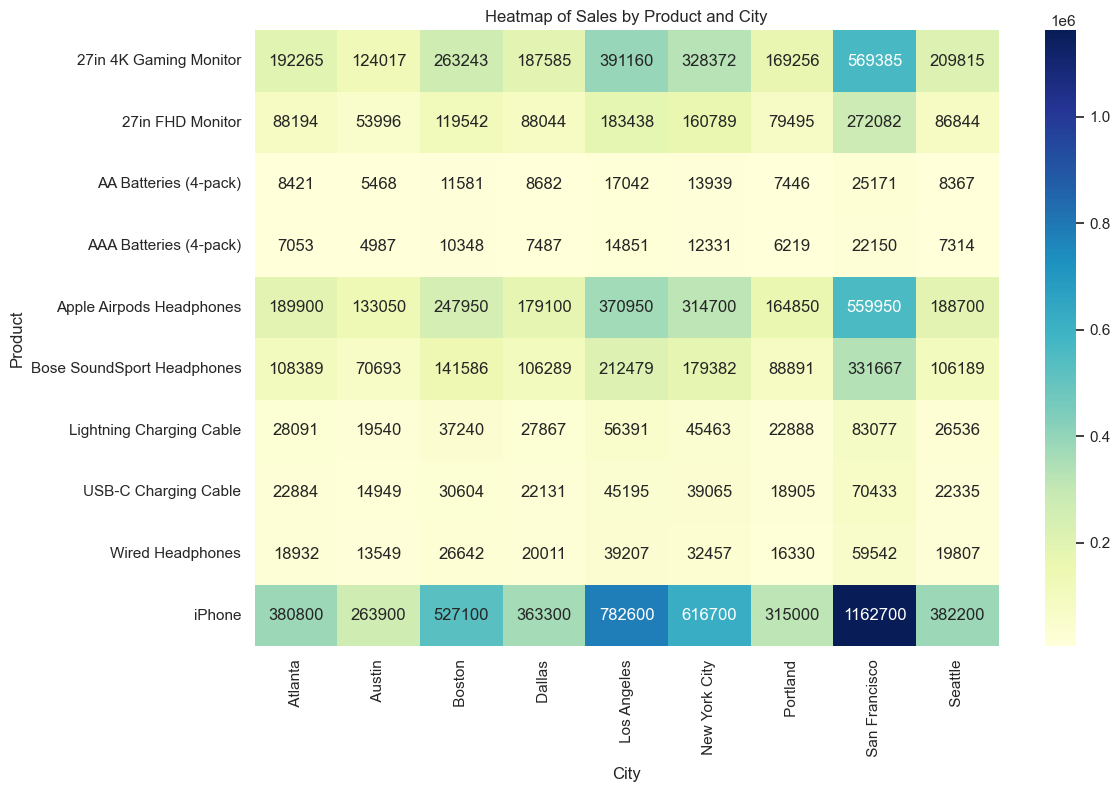

In [43]:
# heatmpa for interaction between multiple features
pivot_table = df.pivot_table(values= 'Sales', index='Product', columns='City', aggfunc = 'sum')
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Heatmap of Sales by Product and City')
plt.show()

In [44]:
#We use the uniue command to check all the unique products
products = data["Product"].unique()
print(products)


['Macbook Pro Laptop' 'LG Washing Machine' 'USB-C Charging Cable'
 '27in FHD Monitor' 'AA Batteries (4-pack)' 'ThinkPad Laptop'
 'Google Phone' 'Bose SoundSport Headphones' 'Wired Headphones'
 'AAA Batteries (4-pack)' 'Apple Airpods Headphones'
 'Lightning Charging Cable' 'Vareebadd Phone' 'iPhone' '20in Monitor'
 '34in Ultrawide Monitor' 'Flatscreen TV' '27in 4K Gaming Monitor'
 'LG Dryer']


In [45]:
product_quantities = data[["Product", "Quantity Ordered"]].groupby("Product").sum()
product_quantities.head()

,Quantity Ordered
Product,
20in Monitor,2954
27in 4K Gaming Monitor,4473
27in FHD Monitor,5494
34in Ultrawide Monitor,4422
AA Batteries (4-pack),19832


In [46]:
product_quantities = product_quantities["Quantity Ordered"].sort_values(ascending=False)
product_quantities.head()

Product
AAA Batteries (4-pack)      22319
AA Batteries (4-pack)       19832
USB-C Charging Cable        17421
Lightning Charging Cable    16740
Wired Headphones            14744
Name: Quantity Ordered, dtype: int64

In [47]:
my_criterion = { product : product_quantities[product]/data[data["Product"]==product]["Price Each"].mean() for product in products }
my_criterion = pd.Series(my_criterion).sort_values(ascending=False)
my_criterion.head()

AAA Batteries (4-pack)      7464.548495
AA Batteries (4-pack)       5164.583333
USB-C Charging Cable        1457.824268
Wired Headphones            1229.691410
Lightning Charging Cable    1119.732441
dtype: float64

In [48]:
cities = data["City"].unique()
print(cities)

[' New York City' ' San Francisco' ' Atlanta' ' Los Angeles' ' Boston']


In [49]:
product_sells_per_sity = {
    city : data[data["City"] == city][["Product", "Quantity Ordered"]].groupby("Product").sum()["Quantity Ordered"].sort_values(ascending=False) for city in cities
}

In [50]:
for city, products in product_sells_per_sity.items():
    print(city)
    print(products.head(), end="\n\n")

 New York City
Product
AAA Batteries (4-pack)      4124
AA Batteries (4-pack)       3630
USB-C Charging Cable        3269
Lightning Charging Cable    3041
Wired Headphones            2707
Name: Quantity Ordered, dtype: int64

 San Francisco
Product
AAA Batteries (4-pack)      7408
AA Batteries (4-pack)       6555
USB-C Charging Cable        5894
Lightning Charging Cable    5557
Wired Headphones            4966
Name: Quantity Ordered, dtype: int64

 Atlanta
Product
AAA Batteries (4-pack)      2359
AA Batteries (4-pack)       2193
USB-C Charging Cable        1915
Lightning Charging Cable    1879
Wired Headphones            1579
Name: Quantity Ordered, dtype: int64

 Los Angeles
Product
AAA Batteries (4-pack)      4967
AA Batteries (4-pack)       4438
USB-C Charging Cable        3782
Lightning Charging Cable    3772
Wired Headphones            3270
Name: Quantity Ordered, dtype: int64

 Boston
Product
AAA Batteries (4-pack)      3461
AA Batteries (4-pack)       3016
USB-C Charging Cable  

In [51]:
my_criterion = { product : data[data["Product"]==product]["Quantity Ordered"].mean() for product in products }
my_criterion = pd.Series(my_criterion).sort_values(ascending=False)
my_criterion.head()

3461   NaN
3016   NaN
2561   NaN
2491   NaN
2222   NaN
dtype: float64